In [1]:
import numpy as np
import tensorflow as tf
from ts.data.generate.univariate.nonexo import StandardGenerator
from ts.utility import Utility
from ts.model.multivariate import DeepNN
from ts.plot import Plot

In [2]:
n = 20200
trainN = 20000
seqLength = 500

data = np.expand_dims(StandardGenerator('long_term').generate(n), axis=1)

In [3]:
trainData, testData = Utility.trainTestSplit(data, trainN)
trainSequences = Utility.breakTrainSeq(trainData, None, seqLength)

In [4]:
forecastHorizon = 1
lag = 30

model = DeepNN(
    forecastHorizon=forecastHorizon,
    lag=lag,
    numUnitsPerLayer=10,
    numLayers=2,
    numTargetVariables=1,
    numExoVariables=0
)

In [5]:
loss = model.train(
    trainSequences=trainSequences,
    numIterations=20,
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(
            0.1,
            25,
            0.97
        )
    ),
    verboseLevel=2,
    returnLosses=True
)

Epoch 1/20
40/40 - 0s - loss: 1.1900
Epoch 2/20
40/40 - 0s - loss: 1.0886
Epoch 3/20
40/40 - 0s - loss: 1.0887
Epoch 4/20
40/40 - 0s - loss: 1.0772
Epoch 5/20
40/40 - 0s - loss: 1.0746
Epoch 6/20
40/40 - 0s - loss: 1.0650
Epoch 7/20
40/40 - 0s - loss: 1.0633
Epoch 8/20
40/40 - 0s - loss: 1.0614
Epoch 9/20
40/40 - 0s - loss: 1.0579
Epoch 10/20
40/40 - 0s - loss: 1.0584
Epoch 11/20
40/40 - 0s - loss: 1.0631
Epoch 12/20
40/40 - 0s - loss: 1.0606
Epoch 13/20
40/40 - 0s - loss: 1.0516
Epoch 14/20
40/40 - 0s - loss: 1.0499
Epoch 15/20
40/40 - 0s - loss: 1.0557
Epoch 16/20
40/40 - 0s - loss: 1.0571
Epoch 17/20
40/40 - 0s - loss: 1.0514
Epoch 18/20
40/40 - 0s - loss: 1.0505
Epoch 19/20
40/40 - 0s - loss: 1.0461
Epoch 20/20
40/40 - 0s - loss: 1.0390


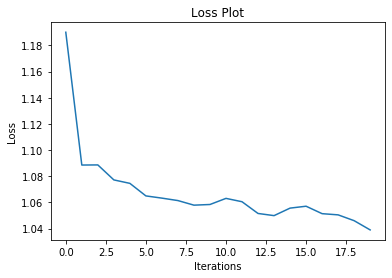

In [6]:
Plot.plotLoss(loss)

Eval Loss: 1.122397836086394


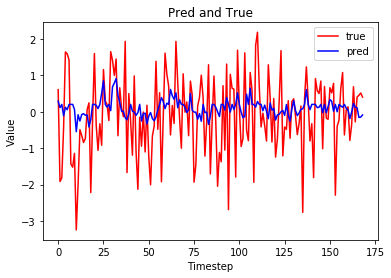

In [8]:
evalLoss, Ypred = model.evaluate(
    testData,
    returnPred=True
)

Ytrue = testData[lag + forecastHorizon:, :]

print(f'Eval Loss: {evalLoss}')
Plot.plotPredTrue(Ypred, Ytrue)